In [3]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u
import astropy.constants as const
from scipy.interpolate import interpolate

#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [4]:
import stistools

Extracting only the observations from Bourrier+17a, trying to recreate them exactly.

In [5]:
x1ds = glob.glob('/home/david/work/muscles/trappist-1/hst/g140m_cals/b_extract/*x1d*')

In [6]:
x1ds

['/home/david/work/muscles/trappist-1/hst/g140m_cals/b_extract/od3v02010_b17_x1d.fits',
 '/home/david/work/muscles/trappist-1/hst/g140m_cals/b_extract/od3v01010_b17_x1d.fits',
 '/home/david/work/muscles/trappist-1/hst/g140m_cals/b_extract/od3v01020_b17_x1d.fits',
 '/home/david/work/muscles/trappist-1/hst/g140m_cals/b_extract/od3v03010_b17_x1d.fits']

In [7]:
lya = Table.read('../combined/bourrier_lya.txt', format ='ascii')
lw, lf = lya['WAVELENGTH'], lya['FLUX']

In [8]:
f_new = []
e_new = []
i = 0
for x in x1ds:
    data = fits.getdata(x, 1)[0]
    if i == 0:
        w_new = data['WAVELENGTH']
        f_new.append(data['FLUX'])
        e_new.append(data['ERROR'])
    else:
        fi = interpolate.interp1d(data['WAVELENGTH'], data['FLUX'], fill_value='extrapolate')(w_new)
       # wi, fi = resample.bintogrid(data['WAVELENGTH'], data['FLUX'],  newx = w_new )
        f_new.append(fi)
        ei = interpolate.interp1d(data['WAVELENGTH'], data['ERROR'], fill_value='extrapolate')(w_new)
        e_new.append(ei)
    #plt.step(data['WAVELENGTH'], data['FLUX'])
    #f_new.append(data['FLUX'])
    i += 1
#w_new = data['WAVELENGTH']
f_new = np.mean(np.array(f_new), axis=0)
#f_new = np.average(f_new, weights = 1/np.array(e_new)
#e_new = np.mean(np.array(e_new), axis=0)
e_new = (np.sum(np.array(e_new)**2, axis=0)**0.5)/(i**0.5)


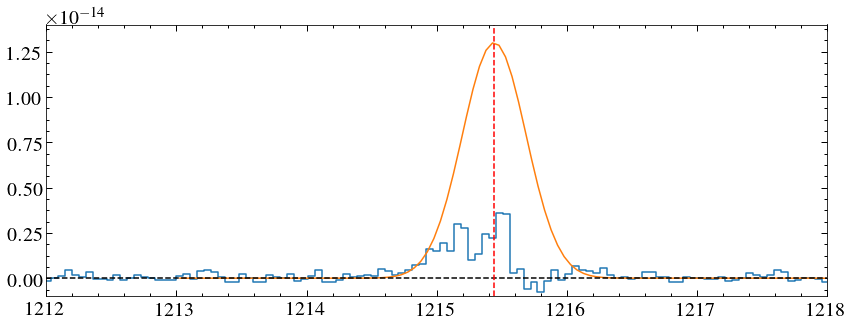

In [9]:
plt.step(w_new, f_new)
#plt.step(w_new, e_new)
#plt.step(w_full, f_full)
plt.plot(lw, lf)
plt.xlim(1212, 1218)

plt.ylim(-1e-15, 1.4e-14)
plt.axhline(0, c='k', ls ='--')
plt.axvline(1215.44, ls ='--', c='r')

Not the same...

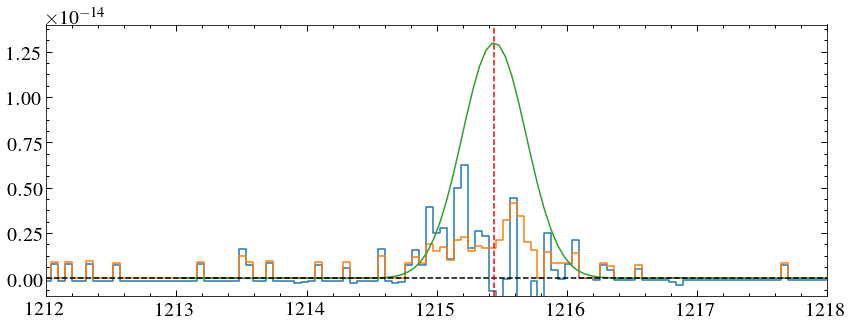

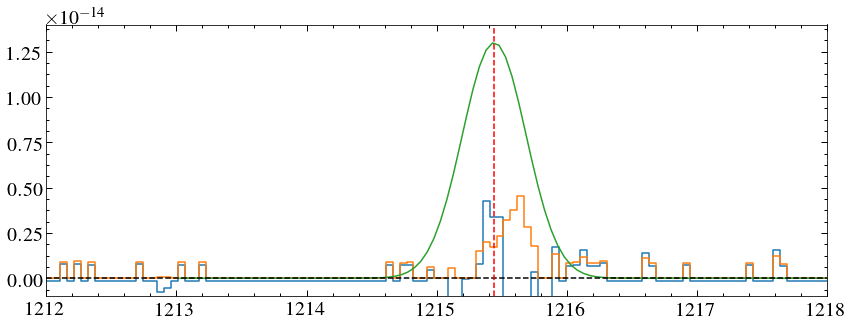

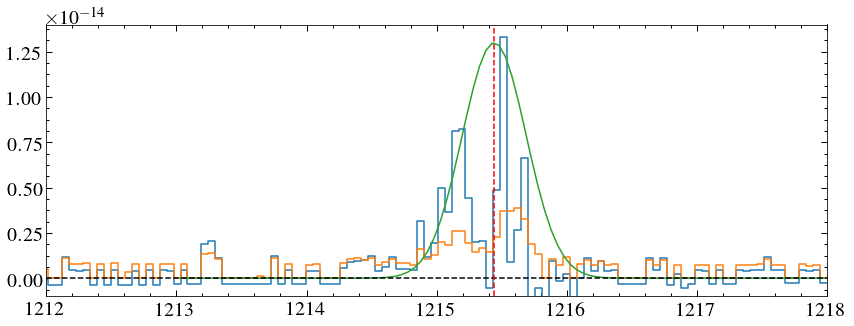

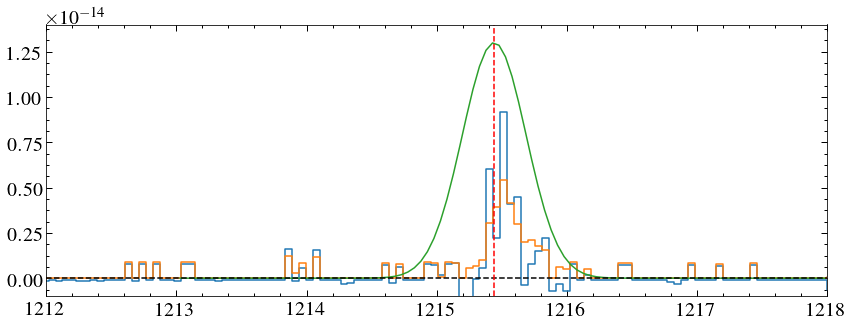

In [10]:
for x in x1ds:
    data = fits.getdata(x,1)[0]
    #date = fits.getheader(x, 0)['TDATEOBS']
   # if date in dates[0:3]:
    #    print(date)
    plt.step(data['WAVELENGTH'], data['FLUX'])
    plt.step(data['WAVELENGTH'], data['ERROR'])
    plt.plot(lw, lf)
    plt.xlim(1212, 1218)

    plt.ylim(-1e-15, 1.4e-14)
    plt.axhline(0, c='k', ls ='--')
    plt.axvline(1215.44, ls ='--', c='r')
    plt.show()

Huh. Did I do the extraction wrong?